# Assignment 3 - Building a Custom Visualization

---

In this assignment you must choose one of the options presented below and submit a visual as well as your source code for peer grading. The details of how you solve the assignment are up to you, although your assignment must use matplotlib so that your peers can evaluate your work. The options differ in challenge level, but there are no grades associated with the challenge level you chose. However, your peers will be asked to ensure you at least met a minimum quality for a given technique in order to pass. Implement the technique fully (or exceed it!) and you should be able to earn full grades for the assignment.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ferreira, N., Fisher, D., & Konig, A. C. (2014, April). [Sample-oriented task-driven visualizations: allowing users to make better, more confident decisions.](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In Proceedings of the SIGCHI Conference on Human Factors in Computing Systems (pp. 571-580). ACM. ([video](https://www.youtube.com/watch?v=BI7GAs-va-Q))


In this [paper](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) the authors describe the challenges users face when trying to make judgements about probabilistic data generated through samples. As an example, they look at a bar chart of four years of data (replicated below in Figure 1). Each year has a y-axis value, which is derived from a sample of a larger dataset. For instance, the first value might be the number votes in a given district or riding for 1992, with the average being around 33,000. On top of this is plotted the 95% confidence interval for the mean (see the boxplot lectures for more information, and the yerr parameter of barcharts).

<br>
<img src="readonly/Assignment3Fig1.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Figure 1 from (Ferreira et al, 2014).</h4>

<br>

A challenge that users face is that, for a given y-axis value (e.g. 42,000), it is difficult to know which x-axis values are most likely to be representative, because the confidence levels overlap and their distributions are different (the lengths of the confidence interval bars are unequal). One of the solutions the authors propose for this problem (Figure 2c) is to allow users to indicate the y-axis value of interest (e.g. 42,000) and then draw a horizontal line and color bars based on this value. So bars might be colored red if they are definitely above this value (given the confidence interval), blue if they are definitely below this value, or white if they contain this value.


<br>
<img src="readonly/Assignment3Fig2c.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  Figure 2c from (Ferreira et al. 2014). Note that the colorbar legend at the bottom as well as the arrows are not required in the assignment descriptions below.</h4>

<br>
<br>

**Easiest option:** Implement the bar coloring as described above - a color scale with only three colors, (e.g. blue, white, and red). Assume the user provides the y axis value of interest as a parameter or variable.


**Harder option:** Implement the bar coloring as described in the paper, where the color of the bar is actually based on the amount of data covered (e.g. a gradient ranging from dark blue for the distribution being certainly below this y-axis, to white if the value is certainly contained, to dark red if the value is certainly not contained as the distribution is above the axis).

**Even Harder option:** Add interactivity to the above, which allows the user to click on the y axis to set the value of interest. The bar colors should change with respect to what value the user has selected.

**Hardest option:** Allow the user to interactively set a range of y values they are interested in, and recolor based on this (e.g. a y-axis band, see the paper for more details).

---

*Note: The data given for this assignment is not the same as the data used in the article and as a result the visualizations may look a little different.*

- Note:
**It is natural to interpret a 95% confidence interval as an interval with a 0.95 probability of containing the population mean.**

In [48]:
# Use the following data for this assignment:
import pandas as pd
import numpy as np

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                   index=[1992,1993,1994,1995])
df = df.transpose()
df

,1992,1993,1994,1995
0,-8941.531897,-51896.094813,152336.932066,-69708.439062
1,127788.667612,198350.518755,192947.128056,-13289.977022
2,-71887.743011,-123518.252821,389950.263156,-30178.390991
3,-79146.060869,-129916.759685,-93006.152024,55052.181256
4,425156.114501,216119.147314,100818.575896,152883.621657
...,...,...,...,...
3645,24185.008589,-37333.493572,-71861.846997,39937.199964
3646,-56826.729535,103019.841174,26375.113219,139472.114293
3647,-67319.766489,179746.127403,-29328.078384,59386.186379
3648,113377.299342,13455.493990,65858.761714,73362.229590


In [49]:
%matplotlib notebook
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib.colors as col
import matplotlib.cm as cm
# we get the mean and the std for each year.
means = list(df.mean())
std  = list( df.std())
# the size of the sample we are dealing with is the size of dataframe itself.
n = len(df)
# after googling , we found out that for 95% confidence interval z is const.
z = 1.96

 - `x` : Sample mean (Avg)
 - `z` : Z_value corresponding to confidence leve(95%)
 - `s` : Sample standard devition (Std)
 - `n` : Sample size
![Confidence_Interval_formula](Confidence_Interval_formula.png)

- Pandas dataframe.sem() function return unbiased standard error of the mean over requested axis. The standard error (SE) of a statistic (usually an estimate of a parameter) is the standard deviation of its sampling distribution[1] or an estimate of that standard deviation. If the parameter or the statistic is the mean, it is called the standard error of the mean (SEM).

In [50]:
# apply the formula to get the 'upper interval' , 'lower interval' ,& 'diff'

upper = []
lower = []
# this represents the error that could occur either + or -.
# Unbiased Standard Error.without adding or subtracting the sample mean x`.
diffs = df.sem().values*1.96
for i in range (0,4):
    upper.append(mean[i] + (z*(std[i]/np.sqrt(n))))
    lower.append(mean[i] - (z*(std[i]/np.sqrt(n))))
    # diffs.append(upper[i] - lower[i]) 

<IPython.core.display.Javascript object>


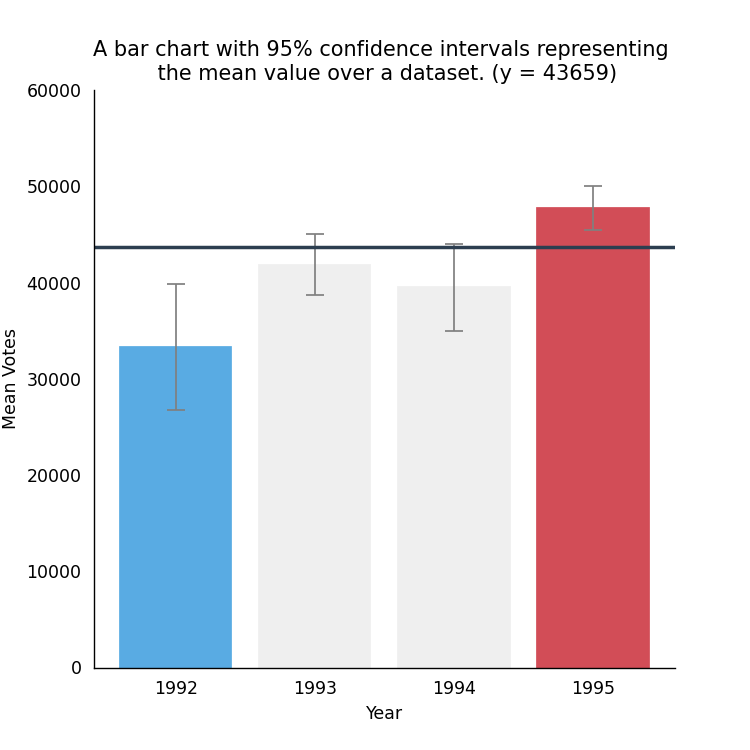

In [51]:
# create the plot givens.
x_ticks = [0,1,2,3]
x_labels = ['1992' , '1993' , '1994' , '1995']
colors = ['#D24D57','#efefef','#59ABE3']
yval = 40000

# calling out the interactive functions.
fig = plt.figure(figsize=(6,6))

# set the bars.
barplot = plt.bar(x_ticks , means ,yerr = diffs ,color = colors, 
               error_kw=dict(ecolor='gray', lw=1, capsize=5, capthick=1))
# set the line.
plt.axhline(y= yval, color = '#2C3E50', lw = 2)

# set ticks , labels & titles.
plt.xticks(x_ticks,x_labels)
plt.xlabel('Year')
plt.ylabel('Mean Votes')
plt.title('A bar chart with 95% confidence intervals representing \n the mean value over a dataset. (y = {})'.format(yval))

# remove plot ticks.
plt.tick_params(axis='x', which='both', bottom=False,top=False)
plt.tick_params(axis='y', which='both', right=False,left=False)
# remove plot frame.
for pos in ['right', 'top']:
    plt.gca().spines[pos].set_visible(False)

In [52]:
# Barplot -------------------------------------------------------------
def drawplot(yval):
    for diff, rect in zip(diffs, barplot.get_children()):
        h = rect.get_height() # height of the Rectangle
        
        if ( h + diff <  yval):  # yval greater than max c_interval.
            rect.set_color(colors[2])
        if ( h - diff >  yval):  # yval smaller than min c_interval.
            rect.set_color(colors[0]) 
        if ((h - diff <  yval) & (h + diff >  yval)): # yval within ci.
            rect.set_color(colors[1])

    plt.xticks(range(len(df.columns)), df.columns)
    plt.ylim(0,60000)
    
    # Removing Frame
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

# Horizontal line -------------------------------------------------------------
def drawline(yval):
    # lines[2] : to draw just an one line. we tried to change 2 to another num but it ends up with unwanted results.
    # remove(): to remove the line of the previous click and so on, to leave it clear.
    plt.gca().lines[2].remove()
    plt.axhline(yval, color = '#2C3E50', lw = 2)

# Interactivity -------------------------------------------------------------
def onclick(event):
    drawplot(event.ydata)
    drawline(event.ydata)
    yval = event.ydata
    plt.title('A bar chart with 95% confidence intervals representing \n the mean value over a dataset. (y = {})'.format(int(round(yval,0))))


In [53]:
# Interactivity in action.           LOOK ABOVE SWEETY
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

7

## Code inspection.

In [61]:
# Discover what get_children() & get_height() do.
for diff, rect in zip(diffs, barplot.get_children()):
        h = rect.get_height()
        print(rect ,'\n',h,'\n',diff)

Rectangle(xy=(-0.4, 0), width=0.8, height=33312.1, angle=0) 
 33312.10747554433 
 6508.897969970325
Rectangle(xy=(0.6, 0), width=0.8, height=41861.9, angle=0) 
 41861.85954107339 
 3192.2543136890313
Rectangle(xy=(1.6, 0), width=0.8, height=39493.3, angle=0) 
 39493.3049413989 
 4553.902287088243
Rectangle(xy=(2.6, 0), width=0.8, height=47743.6, angle=0) 
 47743.55096926713 
 2263.8517443103765


In [62]:
# the 4 bars (Rectangle) in the plot.
barplot.get_children()

- The `gcf()` function in pyplot module of matplotlib library is used to get the current Axes instance on the current figure matching the given keyword args, or create one.

In [ ]:
# %matplotlip inline 
plt.gca().lines
plt.show() # this showed us only empty plot.

# Easy Option

<IPython.core.display.Javascript object>


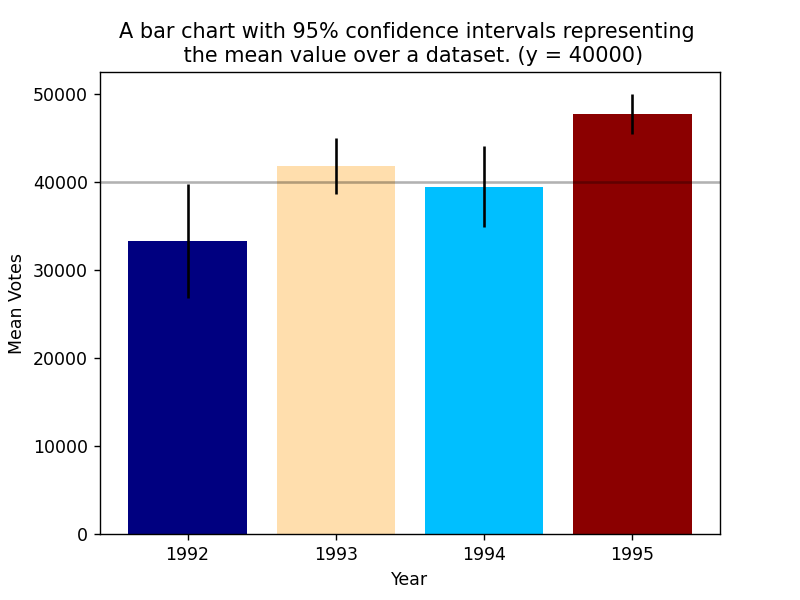

In [21]:

x_ticks = [0,1,2,3]
x_labels = ['1992' , '1993' , '1994' , '1995']
colors = ['navy','navajowhite','deepskyblue','darkred'] 
y=40000

plt.figure()
plt.bar(x_ticks, means, yerr=diffs, color=colors)
plt.axhline(y=y, color = 'black', alpha=.3)

plt.xticks(x_ticks, x_labels)
plt.xlabel('Year')
plt.ylabel('Mean Votes')
plt.title('A bar chart with 95% confidence intervals representing \n the mean value over a dataset. (y = {})'.format(y));

# Review 1

<IPython.core.display.Javascript object>


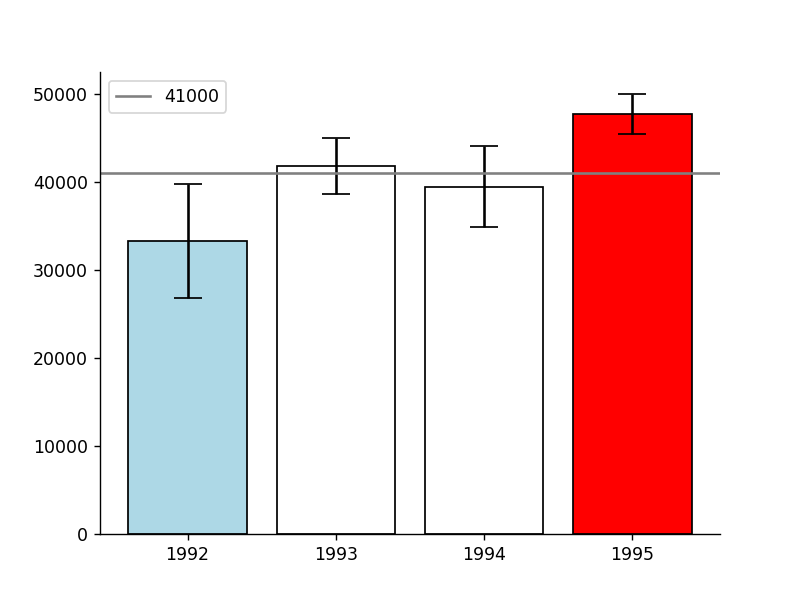

In [22]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

plt.figure()
xvals = list(df.index)
plt.xticks(xvals)
df_std = df.std(axis=1)/np.sqrt(df.shape[1])
yerr = df_std*1.96

list_of_yerrs = []
for i in df.index:
    list_of_yerrs.append(yerr[i])
list_of_means = []
for i in df.index:
    list_of_means.append(df.mean(axis=1)[i])
counter = 0
for i in df.index:
    if (list_of_means[counter] - list_of_yerrs[counter]) > 41000:
        plt.bar(i, df.mean(axis=1)[i], color='red',yerr=yerr[i], width = .8, capsize=8,edgecolor='black')
    elif (list_of_means[counter] - list_of_yerrs[counter]) < 41000 and (list_of_means[counter] + list_of_yerrs[counter]) > 41000:
        plt.bar(i, df.mean(axis=1)[i], color='white',yerr=yerr[i], width = .8, capsize=8,edgecolor='black')
    else:
        plt.bar(i, df.mean(axis=1)[i], color='LightBlue',yerr=yerr[i], width = .8, capsize=8,edgecolor='black')
    counter += 1
    
# plt.bar(xvals, df.mean(axis=1), yerr=yerr, width = .8, capsize=8)
plt.axhline(y=41000,color='gray',label='41000')
ax = plt.gca()
ax.legend()
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)
# plt.show()

plt.show()
# plt.bar(x_pos, height, color=['black', 'red', 'green', 'blue', 'cyan'])

# Review 2

<IPython.core.display.Javascript object>


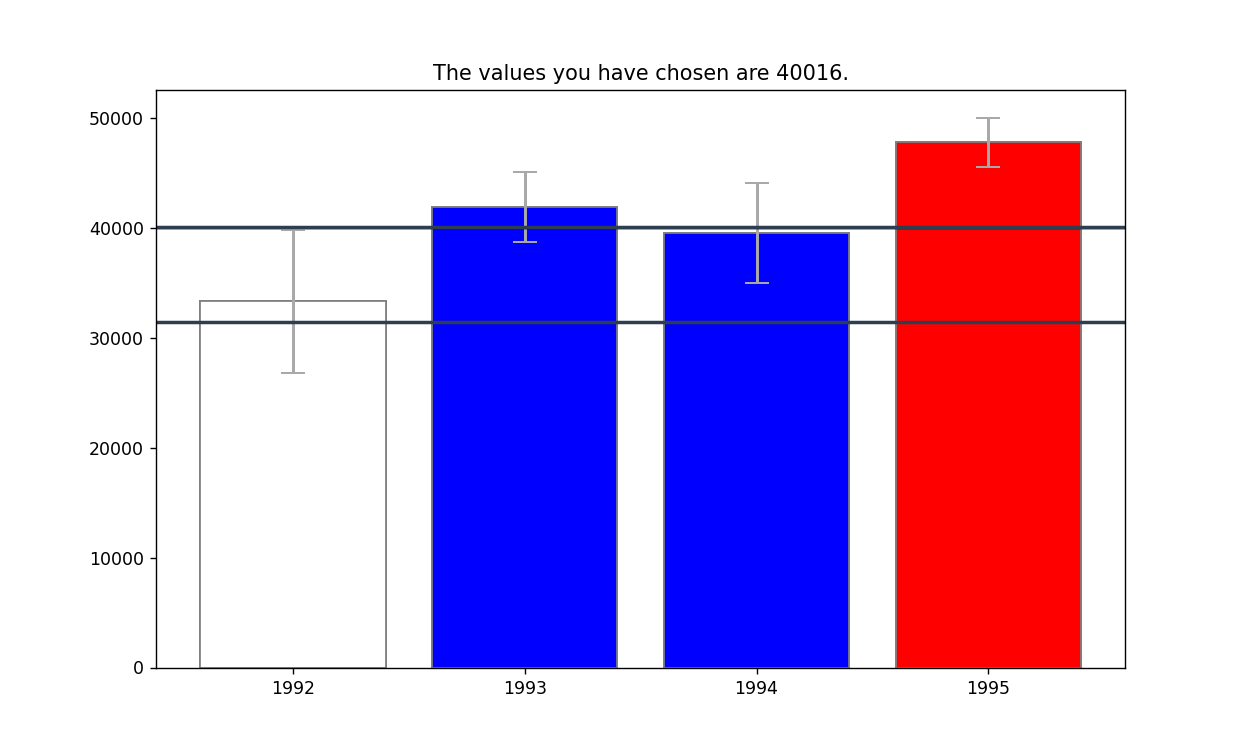

In [63]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import SpanSelector
import statistics

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

#Transform the dataframe
tdf = df.T

#Calculate averages by year and round the results
df_avgs = list(tdf.mean(axis=0))
rounded_avgs = [round(x, 1) for x in df_avgs]

#Calculate the Standard Error of the Mean and the 95% CI
df_std = list(tdf.std(axis=0))
# standard error of means.
sem = [x/(len(df.loc[1992])**(1/2)) for x in df_std]
ci_95 = [round(x * 1.96,1) for x in sem]
ci_min = [rounded_avgs[i] - ci_95[i] for i in range(len(rounded_avgs))]
ci_max = [rounded_avgs[i] + ci_95[i] for i in range(len(rounded_avgs))]

# width of the bars & The x position of bars
barWidth = .8
x_labels = [str(x) for x in df.index]
x_pos = np.arange(len(rounded_avgs))

# Create bars
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
#plot initial
yval = 40000
ax.bar(x_pos, rounded_avgs, width = barWidth, edgecolor = 'grey', ecolor = 'darkgrey', yerr=ci_95, capsize=7, tick_label = x_labels)
ax.set_title('Use your mouse to select a range of y-values')
ax.axhline(y= yval, color = 'black', alpha=.3)


def onselect_function(event):
    yval = event.ydata
    ax.set_title('The values you have chosen are {}.'.format(int(round(yval,0))))
    clrs = []
    for i in range(len(ci_min)):
        if ci_min[i] > yval :
            clrs.append('r')
        elif ci_max[i] < yval :
            clrs.append('w')
        else :
            clrs.append('b')
    # Therefore, edit the barplot.        
    ax.bar(x_pos, rounded_avgs, width = barWidth, edgecolor = 'grey', ecolor = 'darkgrey', yerr=ci_95,
           capsize=7, tick_label = x_labels, color = clrs)
    ax.axhline(yval, color = '#2C3E50', lw = 2)
    ax.gca().lines[-1].remove()
    


# Interactivity in action.           LOOK ABOVE SWEETY
plt.gcf().canvas.mpl_connect('button_press_event', onselect_function)    
plt.show()

# Good Example: to understand Error Bars.

We'll apply error bars to the Coefficient of Thermal Expansion data used in a previous section. First the data is stored in three NumPy arrays. Then the mean or average of each array is calculated. `The mean of each array will be the height of the bars in the bar plot`. Next, the standard deviation of each array is calculated. `The standard deviation will be the height of the error bars`. Finally, a couple lists are created that correspond to `the bar labels (labels), bar positions (x_pos), bar heights (CTEs), and the error bar heights (error)`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
%matplotlib inline

In [5]:
# Data
aluminum = np.array([6.4e-5 , 3.01e-5 , 2.36e-5, 3.0e-5, 7.0e-5, 4.5e-5, 3.8e-5,
                     4.2e-5, 2.62e-5, 3.6e-5])
copper = np.array([4.5e-5 , 1.97e-5 , 1.6e-5, 1.97e-5, 4.0e-5, 2.4e-5, 1.9e-5, 
                   2.41e-5 , 1.85e-5, 3.3e-5 ])
steel = np.array([3.3e-5 , 1.2e-5 , 0.9e-5, 1.2e-5, 1.3e-5, 1.6e-5, 1.4e-5, 
                  1.58e-5, 1.32e-5 , 2.1e-5])

# Calculate the average
aluminum_mean = np.mean(aluminum)
copper_mean = np.mean(copper)
steel_mean = np.mean(steel)


# Calculate the standard deviation
aluminum_std = np.std(aluminum)
copper_std = np.std(copper)
steel_std = np.std(steel)


# Define labels, positions, bar heights and error bar heights
labels = ['Aluminum', 'Copper', 'Steel']
x_pos = np.arange(len(labels))
CTEs = [aluminum_mean, copper_mean, steel_mean]
error = [aluminum_std, copper_std, steel_std]

array([0, 1, 2])

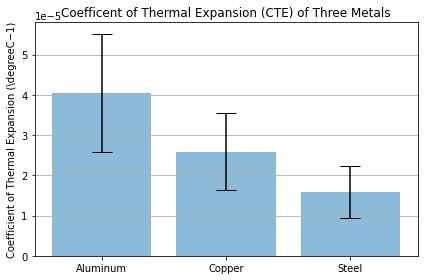

In [4]:
# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('Coefficient of Thermal Expansion (\degreeC−1)')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Coefficent of Thermal Expansion (CTE) of Three Metals')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.show()